## Machine Learning TP1 : Reconnaissance de Champignon

### Import des librairies

In [19]:
import pandas as pd
import numpy as np
import os
from IPython.display import Image, display

from sklearn import preprocessing

from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import ensemble
from sklearn.tree import export_graphviz

from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
# pd.set_option('display.max_rows', None) # Afficher toutes les lignes des dataframes
# pd.set_option('display.max_columns', None) # Afficher toutes les lignes des dataframes

### 1. Preparation des données

1.1 importer et afficher les données dans un DataFrame.

Afficher le nombre de champignons toxiques ou non.

Vérifier qu'il n'y as pas de valeurs nulles

In [10]:
my_dataframe = pd.read_csv('champignons.csv', dtype={'object': int})
my_dataframe

,toxicite,surface-chapeau,ecchymoses,attache-lamelles,taille-lamelles,forme-pied,surface-pied-sur-anneau,couleur-pied-sur-anneau,couleur-voile,type-anneau,population
0,toxique,lisse,oui,libre,étroit,élargissant,lisse,blanc,blanc,pendant,dispersée
1,comestible,lisse,oui,libre,large,élargissant,lisse,blanc,blanc,pendant,nombreuse
2,comestible,lisse,oui,libre,large,élargissant,lisse,blanc,blanc,pendant,nombreuse
3,toxique,écaillée,oui,libre,étroit,élargissant,lisse,blanc,blanc,pendant,dispersée
4,comestible,lisse,non,libre,large,effilé,lisse,blanc,blanc,évasé,abondante
...,...,...,...,...,...,...,...,...,...,...,...
8119,comestible,lisse,non,adhérent,large,élargissant,lisse,orange,orange,pendant,clairsemée
8120,comestible,lisse,non,adhérent,large,élargissant,lisse,orange,brun,pendant,variée
8121,comestible,lisse,non,adhérent,large,élargissant,lisse,orange,orange,pendant,clairsemée
8122,toxique,écaillée,non,libre,étroit,effilé,lisse,blanc,blanc,évasé,variée


In [5]:
toxic_count = my_dataframe['toxicite'].value_counts()['toxique']
non_toxic_count = my_dataframe['toxicite'].value_counts()['comestible']

print(f"Number of toxic mushrooms: {toxic_count}")
print(f"Number of non-toxic mushrooms: {non_toxic_count}")

Number of toxic mushrooms: 3916
Number of non-toxic mushrooms: 4208


In [6]:
null_values = my_dataframe.isnull().sum()

print(null_values)

toxicite                   0
surface-chapeau            0
ecchymoses                 0
attache-lamelles           0
taille-lamelles            0
forme-pied                 0
surface-pied-sur-anneau    0
couleur-pied-sur-anneau    0
couleur-voile              0
type-anneau                0
population                 0
dtype: int64


1.2 Encoder les données avec une colonne 1/0 par valeur possible.Eviter de générer une matrice "sparse"\
Afficher la taille des données (lignes x colonnes) et les noms de colonnes générées.\
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder

In [11]:
columns_to_exclude = ['toxicite']

columns_to_encode = my_dataframe.drop(columns=columns_to_exclude).columns

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse_output=False pour éviter la matrice sparse

encoded_data = encoder.fit_transform(my_dataframe[columns_to_encode])

encoded_feature_names = encoder.get_feature_names_out(columns_to_encode)

print("Encoded data size (rows, columns):", encoded_data.shape)
print("Generated column names:")
print(encoded_feature_names)

Encoded data size (rows, columns): (8124, 40)
Generated column names:
['surface-chapeau_fibreuse' 'surface-chapeau_lisse'
 'surface-chapeau_rainurée' 'surface-chapeau_écaillée' 'ecchymoses_non'
 'ecchymoses_oui' 'attache-lamelles_adhérent' 'attache-lamelles_libre'
 'taille-lamelles_large' 'taille-lamelles_étroit' 'forme-pied_effilé'
 'forme-pied_élargissant' 'surface-pied-sur-anneau_fibreuse'
 'surface-pied-sur-anneau_lisse' 'surface-pied-sur-anneau_soyeuse'
 'surface-pied-sur-anneau_écaillée' 'couleur-pied-sur-anneau_beige'
 'couleur-pied-sur-anneau_blanc' 'couleur-pied-sur-anneau_brun'
 'couleur-pied-sur-anneau_cannelle' 'couleur-pied-sur-anneau_gris'
 'couleur-pied-sur-anneau_jaune' 'couleur-pied-sur-anneau_orange'
 'couleur-pied-sur-anneau_rose' 'couleur-pied-sur-anneau_rouge'
 'couleur-voile_blanc' 'couleur-voile_brun' 'couleur-voile_jaune'
 'couleur-voile_orange' 'type-anneau_aucun' 'type-anneau_fibreux'
 'type-anneau_large' 'type-anneau_pendant' 'type-anneau_évasé'
 'population_

1.3 Créer un nouveau DataFrame avec les données et les noms de colonne (méthode get_feature_names_out() de OneHotEncoder). Mélanger les données. Afficher le résultat.

In [15]:
columns_to_exclude = ['toxicite']

columns_to_encode = my_dataframe.drop(columns=columns_to_exclude).columns

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded_data = encoder.fit_transform(my_dataframe[columns_to_encode])

encoded_feature_names = encoder.get_feature_names_out(columns_to_encode)

encoded_df = pd.DataFrame(encoded_data, columns=encoded_feature_names)

shuffled_df = shuffle(encoded_df, random_state=42)

print(shuffled_df)

      surface-chapeau_fibreuse  surface-chapeau_lisse  \
1971                       1.0                    0.0   
6654                       0.0                    1.0   
5606                       0.0                    0.0   
3332                       0.0                    0.0   
6988                       0.0                    1.0   
...                        ...                    ...   
5226                       0.0                    0.0   
5390                       0.0                    0.0   
860                        0.0                    0.0   
7603                       0.0                    1.0   
7270                       1.0                    0.0   

      surface-chapeau_rainurée  surface-chapeau_écaillée  ecchymoses_non  \
1971                       0.0                       0.0             1.0   
6654                       0.0                       0.0             1.0   
5606                       0.0                       1.0             1.0   
3332       

1.4 Creer 4 jeux de données : train features et labels (70%) et dev features et labels (30%).\
Utiliser toxicite_toxique comme label. Ne pas garder de label (toxicite_toxique et toxicite_comestible) dans les features !

In [18]:
my_dataframe['toxicite_label'] = my_dataframe['toxicite'].apply(lambda x: 1 if x == 'toxique' else 0)

columns_to_exclude = ['toxicite', 'toxicite_label']
features = my_dataframe.drop(columns=columns_to_exclude)

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(features)

encoded_feature_names = encoder.get_feature_names_out(features.columns)

encoded_features_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

labels = my_dataframe['toxicite_label']

X_train, X_dev, y_train, y_dev = train_test_split(
    encoded_features_df, labels, test_size=0.3, random_state=42, stratify=labels
)

print("Train features shape:", X_train.shape)
print("Train labels shape:", y_train.shape)
print("Dev features shape:", X_dev.shape)
print("Dev labels shape:", y_dev.shape)

print("\nTrain features (preview):")
print(X_train.head())
print("\nTrain labels (preview):")
print(y_train.head())

Train features shape: (5686, 40)
Train labels shape: (5686,)
Dev features shape: (2438, 40)
Dev labels shape: (2438,)

Train features (preview):
      surface-chapeau_fibreuse  surface-chapeau_lisse  \
325                        0.0                    0.0   
68                         0.0                    0.0   
5529                       0.0                    0.0   
7021                       0.0                    1.0   
3246                       1.0                    0.0   

      surface-chapeau_rainurée  surface-chapeau_écaillée  ecchymoses_non  \
325                        0.0                       1.0             0.0   
68                         0.0                       1.0             0.0   
5529                       0.0                       1.0             1.0   
7021                       0.0                       0.0             1.0   
3246                       0.0                       0.0             1.0   

      ecchymoses_oui  attache-lamelles_adhérent  attach

## 2. Arbre de décision

2.1 Entrainer un arbre de décision sur les données d'apprentissage. Afficher l'arbre obtenu en utilisant plot_tree.

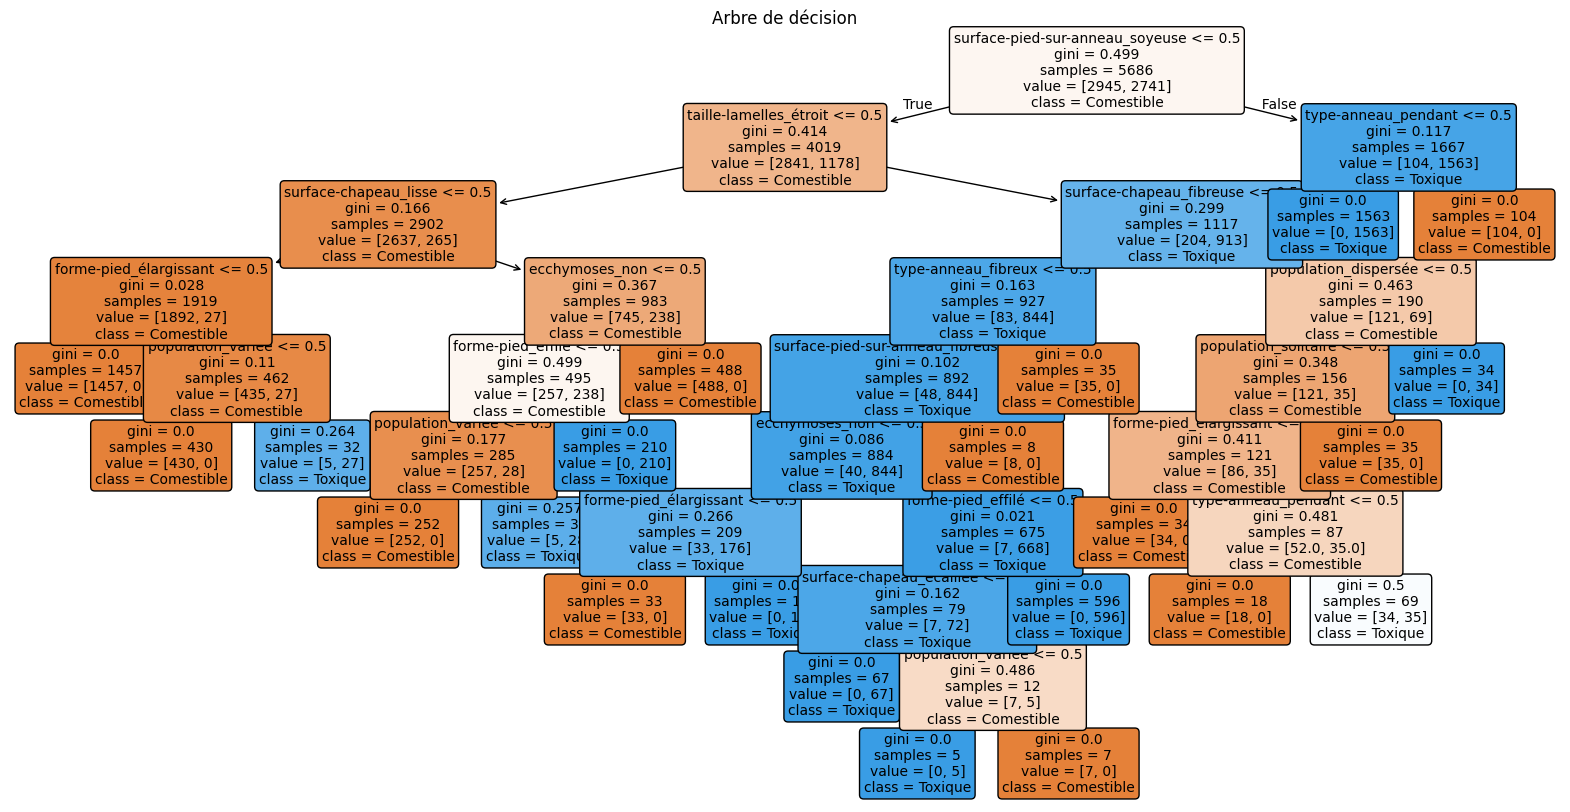

In [22]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

decision_tree = DecisionTreeClassifier(random_state=42)

# Entraîner l'arbre sur les données d'apprentissage
decision_tree.fit(X_train, y_train)

# Visualiser l'arbre obtenu
plt.figure(figsize=(20, 10))  # Taille de l'image
plot_tree(
    decision_tree,
    feature_names=X_train.columns,
    class_names=["Comestible", "Toxique"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Arbre de décision")
plt.show()

2.2 Afficher l'arbre obtenu en utilisant graphwiz

In [23]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    decision_tree,
    out_file=None,
    feature_names=X_train.columns,
    class_names=["Comestible", "Toxique"],
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("decision_tree")
graph.view()

'decision_tree.pdf'

2.3 Mesurer la précision du modèle sur les données de dev

In [24]:
from sklearn.metrics import accuracy_score

y_dev_pred = decision_tree.predict(X_dev)
accuracy = accuracy_score(y_dev, y_dev_pred)

print(f"Précision du modèle sur les données de dev : {accuracy:.2f}")

Précision du modèle sur les données de dev : 0.99


## 3. Modèle de forêt

3.1 Réalisez un algorithme de Random Forest sur les données. Utiliser 500 arbres et une profondeur de 6.

In [27]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=500, max_depth=6, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=500, random_state=42)

3.2 Afficher trois arbres au hasard.

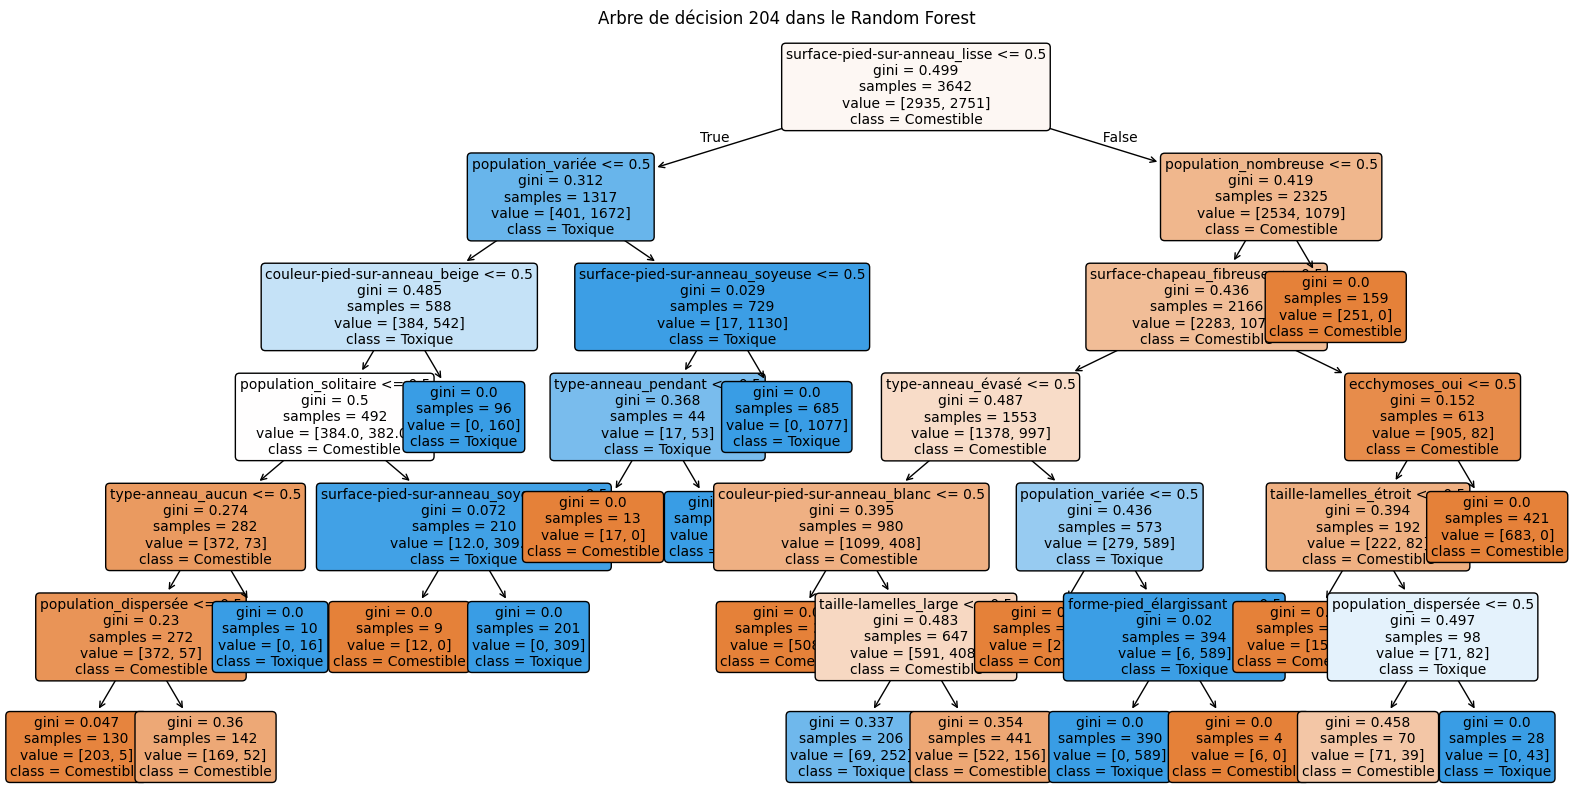

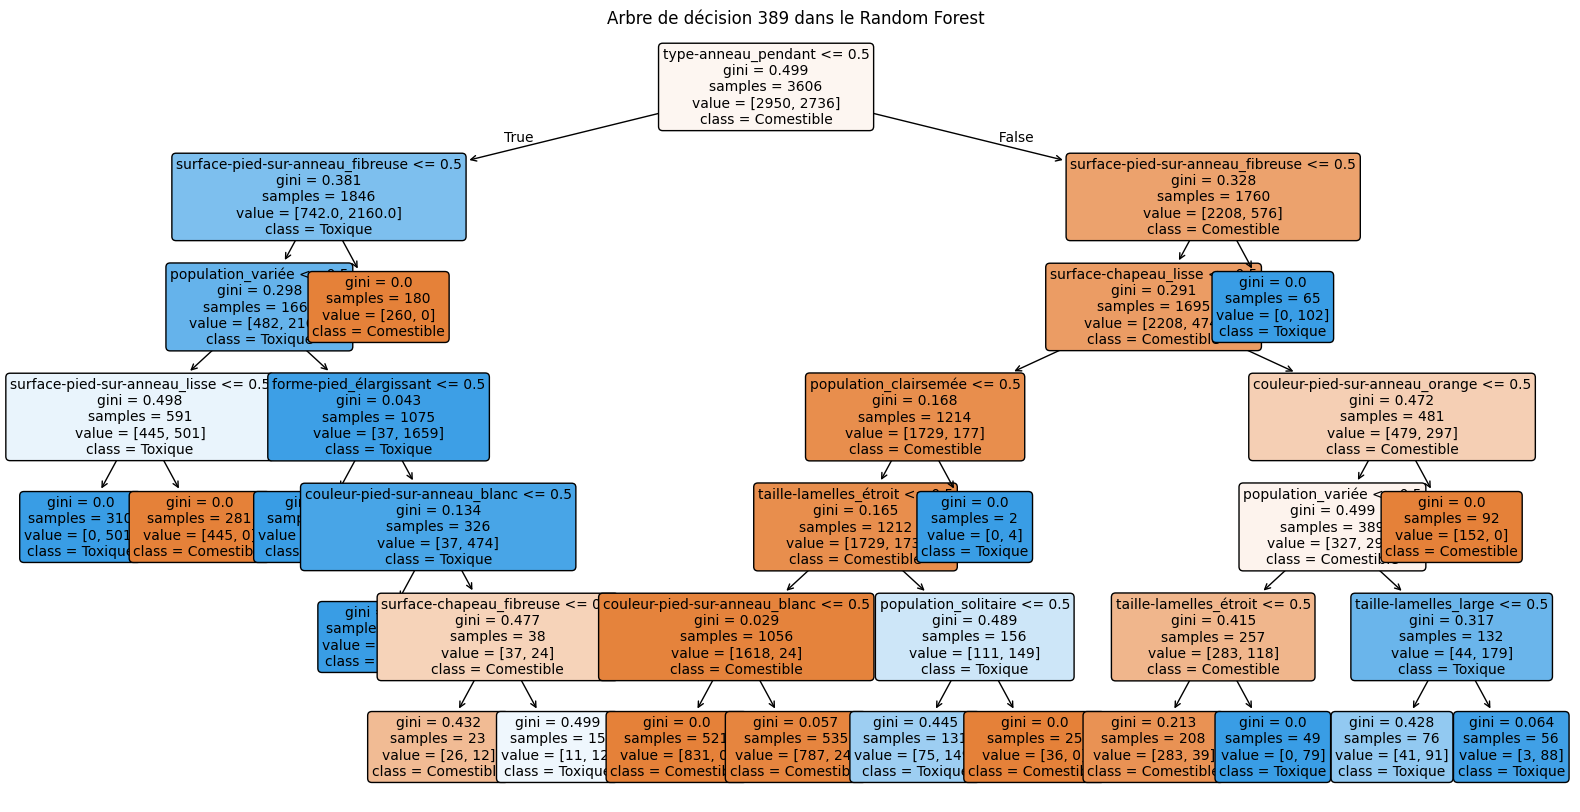

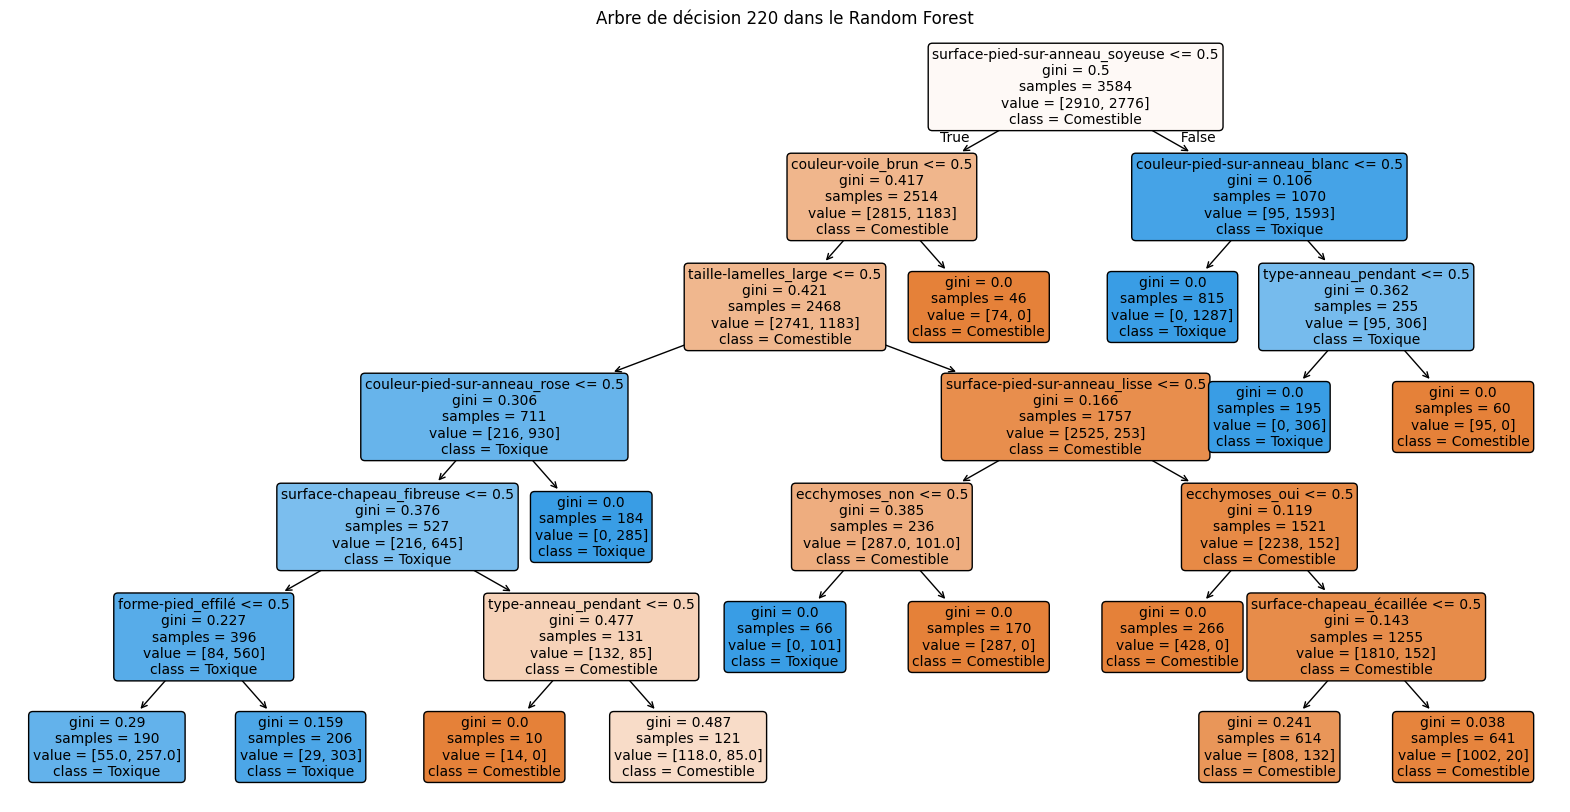

In [26]:
from random import randint

for i in np.random.choice(range(len(random_forest.estimators_)), size=3, replace=False):
    plt.figure(figsize=(20, 10))
    plot_tree(random_forest.estimators_[i],
              feature_names=X_train.columns,
              class_names=["Comestible", "Toxique"],
              filled=True,
              rounded=True,
              fontsize=10)
    plt.title(f"Arbre de décision {i + 1} dans le Random Forest")
    plt.show()

3.3 Mesurer la précision du modèle Random Forest sur les données de dev

In [28]:
y_dev_pred_rf = random_forest.predict(X_dev)
accuracy_rf = accuracy_score(y_dev, y_dev_pred_rf)

print(f"Précision du Random Forest sur les données de dev : {accuracy_rf:.2f}")

Précision du Random Forest sur les données de dev : 0.98


## 4. optimisation des paramètres

4.1 En utilisant GridSearchCV, chercher la meilleure combinaison max_depth et n_estimator.

Afficher les paramètre du modèle et a précision obtenue.

Réexécuter un apprentissage avec la meilleure combinaison.


In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [4, 6, 8, None]
}

rf = RandomForestClassifier(random_state=42)

In [31]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print(f"Meilleurs paramètres : {grid_search.best_params_}")
print(f"Meilleure précision (accuracy) : {grid_search.best_score_:.2f}")

Meilleurs paramètres : {'max_depth': None, 'n_estimators': 500}
Meilleure précision (accuracy) : 0.99


In [34]:
best_rf = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'],
                                 max_depth=grid_search.best_params_['max_depth'],
                                 random_state=42)

best_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

4.2 Afficher les paramètres optimaux et la précisions obtenue sur les données dev

In [37]:
best_rf = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'],
                                 max_depth=grid_search.best_params_['max_depth'],
                                 random_state=42)

best_rf.fit(X_train, y_train)

y_dev_pred_best_rf = best_rf.predict(X_dev)
accuracy_best_rf = accuracy_score(y_dev, y_dev_pred_best_rf)

print(f"Paramètres optimaux : {grid_search.best_params_}")
print(f"Précision obtenue sur les données de dev : {accuracy_best_rf:.2f}")


Paramètres optimaux : {'max_depth': None, 'n_estimators': 500}
Précision obtenue sur les données de dev : 0.99


4.3 Classer et Afficher les caractéristiques d'importance supérieure à 1%

In [38]:
importances = best_rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

important_features = feature_importance_df[feature_importance_df['Importance'] > 0.01]

print(important_features)

                             Feature  Importance
9             taille-lamelles_étroit    0.113894
14   surface-pied-sur-anneau_soyeuse    0.098901
8              taille-lamelles_large    0.095874
32               type-anneau_pendant    0.081170
39                 population_variée    0.069092
31                 type-anneau_large    0.057167
13     surface-pied-sur-anneau_lisse    0.055637
4                     ecchymoses_non    0.043023
11            forme-pied_élargissant    0.040496
10                 forme-pied_effilé    0.040180
5                     ecchymoses_oui    0.039247
1              surface-chapeau_lisse    0.034189
17     couleur-pied-sur-anneau_blanc    0.032776
33                 type-anneau_évasé    0.027300
36              population_dispersée    0.025864
12  surface-pied-sur-anneau_fibreuse    0.024132
0           surface-chapeau_fibreuse    0.021982
38              population_solitaire    0.018879
3           surface-chapeau_écaillée    0.013116
34              popu

## 5. Stacking

Essayer différents modèles d'estimateur final

In [41]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score

models = {
    'SVC': make_pipeline(StandardScaler(), SVC(random_state=42)),
    'LogisticRegression': make_pipeline(StandardScaler(), LogisticRegression(random_state=42)),
    'GaussianNB': make_pipeline(StandardScaler(), GaussianNB()),
    'Perceptron': make_pipeline(StandardScaler(), Perceptron(random_state=42)),
    'StackingClassifier': StackingClassifier(
        estimators=[
            ('svc', make_pipeline(StandardScaler(), SVC(random_state=42))),
            ('lr', make_pipeline(StandardScaler(), LogisticRegression(random_state=42))),
            ('gnb', make_pipeline(StandardScaler(), GaussianNB()))
        ],
        final_estimator=LogisticRegression(random_state=42)
    )
}

for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{model_name} - Précision moyenne : {scores.mean():.2f} ± {scores.std():.2f}")

SVC - Précision moyenne : 0.99 ± 0.00
LogisticRegression - Précision moyenne : 0.95 ± 0.01
GaussianNB - Précision moyenne : 0.73 ± 0.01
Perceptron - Précision moyenne : 0.92 ± 0.03
StackingClassifier - Précision moyenne : 0.99 ± 0.00


## 6. Gradient Boosting

6. Exécuter un apprentissage de Gradient Boosting avec et sans "Early Stopping" sur le nombre d'estimateurs. Comparer avec le résultat sur les données dev.

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

gb_no_early_stopping = GradientBoostingClassifier(n_estimators=500, random_state=42)
gb_no_early_stopping.fit(X_train, y_train)

y_dev_pred_no_early_stopping = gb_no_early_stopping.predict(X_dev)
accuracy_no_early_stopping = accuracy_score(y_dev, y_dev_pred_no_early_stopping)

gb_with_early_stopping = GradientBoostingClassifier(n_estimators=500, validation_fraction=0.1, n_iter_no_change=10, random_state=42)
gb_with_early_stopping.fit(X_train, y_train)

y_dev_pred_with_early_stopping = gb_with_early_stopping.predict(X_dev)
accuracy_with_early_stopping = accuracy_score(y_dev, y_dev_pred_with_early_stopping)

print(f"Précision sans Early Stopping : {accuracy_no_early_stopping:.2f}")
print(f"Précision avec Early Stopping : {accuracy_with_early_stopping:.2f}")

Précision sans Early Stopping : 0.99
Précision avec Early Stopping : 0.99


## 7. (Optionnel) Recommencer les execices précédents en utilisant les "ordinal encoders". Que remarquez-vous ?